### Colab setup

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Scraping with Selenium

In [0]:
# install and setup selenium
!pip install selenium
# !apt-get -q update # to update ubuntu to correctly run apt install
!apt install -yq chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 911kB 4.9MB/s 
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 28 not upgraded.
Need to get 70.8 MB of archives.
After this operation, 254 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 77.0.3865.90-0ubuntu0.18.04.1 [1,079 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 77.0.3865.90-0ubuntu0.18.04.1 [62.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe

In [0]:
import pandas as pd
# webdriver provides capabilities for navigating to web pages
driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [0]:
# scraping and storing data
df = pd.DataFrame(columns=['username', 'date', 'comment'])
df.index.name = "ID"

for i in range(150):
  driver.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p' + str(i+1))

  for each in range(50):
    userid_element = driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[3]/div[5]/div[1]/ul/li[' + str(each+1) + ']/div/div[2]/div[1]/span[1]/a[2]')[0]
    userid = userid_element.text

    user_date = driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[3]/div[5]/div[1]/ul/li[' + str(each+1) + ']/div/div[2]/div[2]/span/a/time')[0]
    date_time = user_date.get_attribute('title')

    user_message = driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[3]/div[5]/div[1]/ul/li[' + str(each+1) + ']/div/div[3]/div/div[1]')[0]
    comment = user_message.text

    df.loc[50*i + each, 'username'] = userid
    df.loc[50*i + each, 'date'] = date_time
    df.loc[50*i + each, 'comment'] = comment

In [0]:
# save data in csv so that we need not scrape everytime
df.to_csv("cars.csv")
df.head()

In [0]:
# df.shape

### Data Processing

In [0]:
import pandas as pd
import nltk
nltk.download('punkt');
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn import manifold

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# importing scraped_data file from gdrive
link = 'https://drive.google.com/open?id=1tMSovqODTJRHBDteziXdOuSdmQWIpSHZ' # Paste the shareable link here

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('scraped_data.csv')

1tMSovqODTJRHBDteziXdOuSdmQWIpSHZ


In [0]:
# importing cars_models file from gdrive
link = 'https://drive.google.com/open?id=1DcsetHDMgd4lCdrQGU9PhTVq8QmPnWRg' # Paste the shareable link here

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cars_models.csv') 

1DcsetHDMgd4lCdrQGU9PhTVq8QmPnWRg


In [0]:
# importing file from gdrive
link = 'https://drive.google.com/open?id=1fKCQEm5rsbguCaQOFKximzfxqblX7u8C' # Paste the shareable link here

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('feature_list.csv')

1fKCQEm5rsbguCaQOFKximzfxqblX7u8C


In [0]:
# importing file from gdrive
link = 'https://drive.google.com/open?id=12dR9zI2hLKYT0m1TdkGWIW2oWaFSBUkd' # Paste the shareable link here

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('aspiration_words.csv') 

12dR9zI2hLKYT0m1TdkGWIW2oWaFSBUkd


In [0]:
# import cars and model details mapping, added a few cars which were not present in the given file
cars_models = pd.read_csv('cars_models.csv')
cars_models.head()

,brand,model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [0]:
# cleaning up the cars models dataframe
cars_models['brand'] = cars_models['brand'].str.lower().str.strip()
cars_models['model'] = cars_models['model'].str.lower().str.strip()

In [0]:
cars_models['brand'].unique()

array(['acura', 'audi', 'bmw', 'buick', 'cadillac', 'car', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyndai kia', 'hyundai',
       'hyundai,', 'hyundai.', 'infiniti', 'kia', 'kia,', 'kia.',
       'lincoln', 'mazda', 'mercedes', 'mercedes benz', 'mercedes-benz',
       'mercury', 'mitsubishi', 'nissan', 'nissan.', 'pontiac', 'problem',
       'saturn', 'seat', 'sedan', 'subaru', 'suzuki', 'toyata', 'toyota',
       'volkswagen', 'volkwagen', 'volvo', 'lexus', 'jaguar', 'porsche',
       'lamborghini', 'renault', 'ferrari'], dtype=object)

In [0]:
cars_models = cars_models[cars_models['brand'] != 'hyndai kia']
cars_models['brand'] = cars_models['brand'].str.replace('mercedes benz','mercedes').str.replace('mercedes-benz','mercedes').str.replace('toyata','toyota')
cars_models['brand'] = cars_models['brand'].str.strip(",").str.strip(".")
cars_models['model'] = cars_models['model'].str.strip(",").str.strip(".")
cars_models.drop_duplicates(inplace= True)
cars_models.reset_index(inplace= True)
cars_models.drop(columns = ['index'], inplace= True)

In [0]:
cars_models.to_csv('cleaned_cars_models.csv')

In [0]:
cars_models_dict = dict(zip(cars_models['model'], cars_models['brand']))

In [0]:
# back to our scrapped data
scrapped_data = pd.read_csv('scraped_data.csv')
scrapped_data = scrapped_data.iloc[:,3:]
scrapped_data.drop_duplicates(inplace=True)
scrapped_data = scrapped_data[scrapped_data['comment'].str.split().str.len() > 15]
scrapped_data['comment'] = scrapped_data['comment'].str.lower()
scrapped_data.reset_index(inplace= True)
scrapped_data.drop(columns = ['index'], inplace=True)
scrapped_data.head()

,username,date,comment
0,merc1,March 2002,i personally think that with a few tweaks the ...
1,fredvh,March 2002,i am debating a new purchase and these two are...
2,hungrywhale,March 2002,and no manual tranny. that may not matter to y...
3,riez,March 2002,one beauty of bmw 3 series is that there are s...
4,blueguydotcom,March 2002,"good grief, so you wait 9 months for the manua..."


In [0]:
# removing stopwords from the comments
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# removing stopwords
stoplist=list(stopwords.words('english'))
scrapped_data['comment'] = scrapped_data['comment']. \
                            map(lambda x: ' '.join([each for each in x.split() if each not in stoplist]))

In [0]:
# removing punctuations
scrapped_data['comment'] = scrapped_data['comment']. \
                            map(lambda x: re.sub(r"[\'!@#$%^&*,.()_\<>?:;~`\[\]\(\)\\\/\"]","",x))

### Top10 Cars

In [0]:
# scrapped_data['comment'].str.split().map(lambda x: cars_models_dict[i] if i in cars_models_dict else i for i in x )

In [0]:
# replacing cars model names with brand names and removing multiple mentions of one brand in a comment using set
scrapped_data['cars_cleaned'] = ""
from nltk.tokenize import word_tokenize
word_corpus_cars = []

for each in range(len(scrapped_data)):
    token = word_tokenize(scrapped_data.loc[each,'comment'])
   
    new_token = []
   
    for j in token:
        if j in cars_models_dict:
            new_token.append(cars_models_dict[j])
        else:
            new_token.append(j)
           
    new_token = list(set(new_token))
   
    scrapped_data.loc[each,'cars_cleaned'] = new_token

    for i in new_token:
        word_corpus_cars.append(i)

In [0]:
scrapped_data.head()

,username,date,comment,cars_cleaned
0,merc1,March 2002,personally think tweaks c320 could also sit to...,"[facelift, 17, one, problem, something, thing,..."
1,fredvh,March 2002,debating new purchase two top list price diffe...,"[debating, 6k, list, dilemma, service, suppose..."
2,hungrywhale,March 2002,manual tranny may matter you certainly matter ...,"[matter, enthusiast, may, even, easy, tranny, ..."
3,riez,March 2002,one beauty bmw 3 series many models choose fro...,"[one, from, convertible, beauty, absolutely, m..."
4,blueguydotcom,March 2002,good grief wait 9 months manual even auto pref...,"[months, driving, thought, mercedes, prefer, l..."


In [0]:
word_count_cars = pd.DataFrame(pd.Series(word_corpus_cars).value_counts()).reset_index()
word_count_cars.columns = ['word','freq']
word_count_cars.head()

,word,freq
0,car,3374
1,bmw,2618
2,like,1727
3,one,1553
4,acura,1470


In [0]:
# unique list of brands
brands = pd.DataFrame(cars_models[~cars_models['brand'].isin(['car','seat','sedan'])]['brand'].unique(), columns=['brands'])

In [0]:
# subset top 10 brands
top10_cars = word_count_cars.merge(brands, how='inner', left_on='word', right_on='brands').iloc[:10,:2]
top10_cars

,word,freq
0,bmw,2618
1,acura,1470
2,infiniti,1305
3,lexus,908
4,mercedes,700
5,audi,612
6,honda,541
7,toyota,439
8,nissan,375
9,cadillac,370


### Lift and MDS

In [0]:
# counting the occurence 
brand = top10_cars['word'].values
l=[]
matrix=pd.DataFrame(columns=range(len(brand)),index=range(len(brand)))
dis_matrix = pd.DataFrame(columns=range(len(brand)),index=range(len(brand)))

n=len(scrapped_data)
for i in range(len(brand)):
  for j in range(i+1,len(brand)):
    counti=0
    countj=0
    countij=0
    for k in scrapped_data['cars_cleaned']:
      if brand[i] in k and brand[j] in k:
        countij+=1
      if brand[i] in k:
        counti+=1
      if brand[j] in k:
        countj+=1
      else:
        pass
    l.append([brand[i],brand[j],counti,countj,countij])
    matrix.loc[i,j]=(countij*n)/(counti*countj)
    matrix.loc[j,i]=(countij*n)/(counti*countj)
    dis_matrix.loc[i,j]=(counti*countj)/(countij*n)
    dis_matrix.loc[j,i]=(counti*countj)/(countij*n)

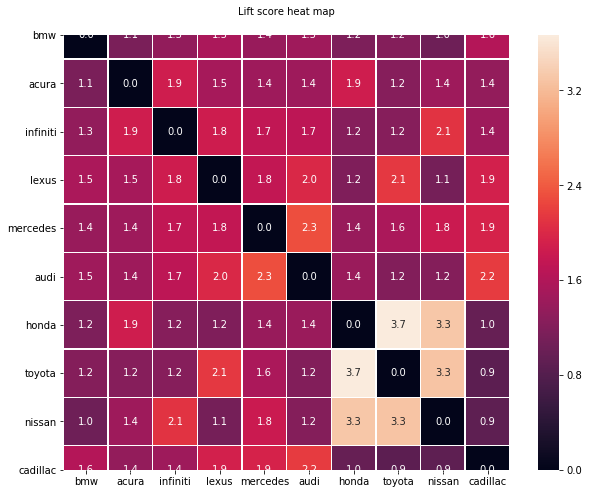

In [0]:
# Lift Matrix
matrix.index=brand
matrix.columns=brand
matrix.fillna(0, inplace=True)

plt.figure(figsize=(10,8))
plt.title('Lift score heat map', fontsize = 10, pad = 20)
sns.heatmap(matrix, linewidths=0.5, annot=True, fmt=".1f", annot_kws={"fontsize":10})

In [0]:
# # Dissimalirty Matrix
# dis_matrix.index=brand
# dis_matrix.columns=brand
# dis_matrix.fillna(0, inplace=True)

# plt.figure(figsize=(10,8))
# plt.title('Lift score heat map', fontsize = 10, pad = 20)
# sns.heatmap(dis_matrix, linewidths=0.5, annot=True, fmt=".1f", annot_kws={"fontsize":10})

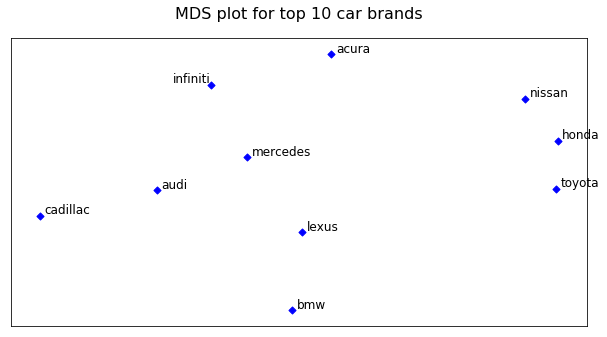

In [0]:
# MDS Map

mdsmatrix=dis_matrix.values

mds=manifold.MDS(n_components=2, dissimilarity ='precomputed', random_state=10)

results=mds.fit(mdsmatrix)
coords=results.embedding_

x=coords[:,0]
y=coords[:,1]

plt.figure(figsize=(8,4)) 

ax=plt.axes([0.,0.,1.,1.])
plt.title('MDS plot for top 10 car brands', fontsize = 16, pad = 20)
plt.scatter(x, y, marker='D', color='blue', s = 25)

n=list(dis_matrix.index)

for i in range(len(n)):
    if n[i] == 'infiniti':
        ax.annotate(n[i], xy= (x[i] - 0.08, y[i] + 0.01), fontsize = 12)
    else:
        ax.annotate(n[i], xy = (x[i] + 0.01, y[i] + 0.01), fontsize = 12)
       
plt.xticks([])
plt.yticks([])

plt.show()

**Insights:**

The lift matrix gives us an idea about how often various pairs of brands are mentioned together in the forum’s comments section.


1. People talk about BMW and Lexus together more than the general expectation of BMW being talked along with Audi or Mercedes. This is strange given the fact that Audi, BMW and Mercedes are considered to be high-end luxury cars which would be expected to be more similar to each other while Lexus was isn’t quite at that level. A possible explanation for this could be that entry level BMW car owners considering to have more value at the same price for a fully loaded Lexus when compared to just the pricey logo of BMW
2. Honda, Toyota and Nissan - the asian cars are clustered together. These 3 are most talked about brands as a group. This can be attributed to the fact that these brands have similar product placements and pricing
3. Acura and Infinity are relatively isolated from other brands which makes it tough for them to get traction in other brand users. On a positve note, they will have less churn rate too.



### Features

In [0]:
# import list of features tagged manually
feature_list = pd.read_csv('feature_list.csv')
feature_list.head()

,Child,Parent
0,interior,interior
1,looks,looks
2,pretty,looks
3,exterior,aesthetics
4,style,looks


#### Finding top 20 features, we will merge them in group of 5 later

In [0]:
# unique list of all features
features_all = pd.DataFrame(feature_list['Child'].unique(), columns=['feature'])

In [0]:
# subset top 10 features
top20_ofall_features = word_count_cars.merge(features_all, how='inner', right_on='feature', left_on = 'word').iloc[:20,:2]
top20_ofall_features

,word,freq
0,performance,938
1,luxury,731
2,price,665
3,engine,571
4,handling,530
5,interior,525
6,manual,499
7,power,459
8,rwd,454
9,sport,430


In [0]:
# get feature counts and prepare lift matrix
features_20 = top20_ofall_features['word'].values
brand5 = top10_cars.iloc[:5,0].values
l=[]
matrix_features=pd.DataFrame(index=range(len(features_20)),columns=range(len(brand5)))

n=len(scrapped_data)
for i in range(len(features_20)):
  for j in range(len(brand5)):
    counti=0
    countj=0
    countij=0
    for k in scrapped_data['cars_cleaned']:
      if features_20[i] in k and brand5[j] in k:
        countij+=1
      if features_20[i] in k:
        counti+=1
      if brand5[j] in k:
        countj+=1
      else:
        pass
    l.append([features_20[i],brand5[j],counti,countj,countij])
    matrix_features.loc[i,j]=(countij*n)/(counti*countj)

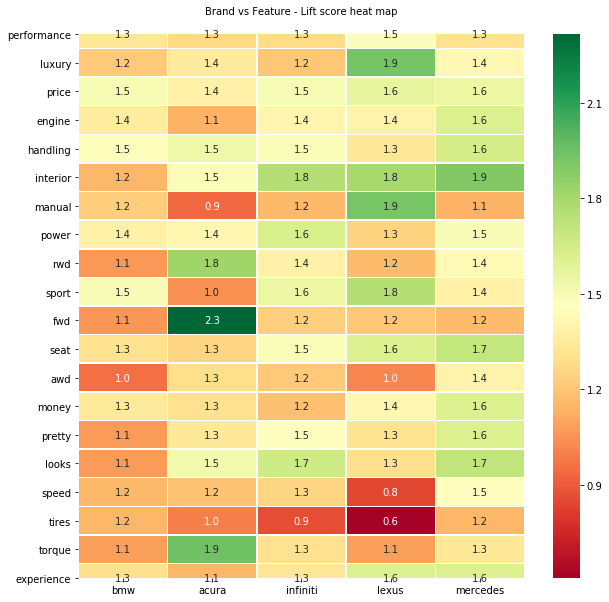

In [0]:
# Lift Matrix
matrix_features.index= features_20
matrix_features.columns= brand5
matrix_features.fillna(0, inplace=True)

matrix_features

plt.figure(figsize=(10,10))
plt.title('Brand vs Feature - Lift score heat map', fontsize = 10, pad = 20)
sns.heatmap(matrix_features, cmap='RdYlGn', linewidths=0.5, annot=True, fmt=".1f", annot_kws={"fontsize":10})

#### Top 5 features merged

In [0]:
feature_list_dict = dict(zip(feature_list['Child'], feature_list['Parent']))

In [0]:
# get differend words corresponding to one feature under one umbrella and get rid of multiple instances of same feature using set
scrapped_data['cleaned_feature_cars'] = ""
from nltk.tokenize import word_tokenize
word_corpus_clean = []

for each in range(len(scrapped_data)):
    token = word_tokenize(scrapped_data.loc[each,'comment'])
   
    new_token = []
   
    for j in token:
        if j in feature_list_dict:
            new_token.append(feature_list_dict[j])
        elif j in cars_models_dict:
            new_token.append(cars_models_dict[j])
        else:
            new_token.append(j)
           
    new_token = list(set(new_token))
   
    scrapped_data.loc[each,'cleaned_feature_cars'] = new_token

    for i in new_token:
        word_corpus_clean.append(i)

In [0]:
scrapped_data.head()

,username,date,comment,cars_cleaned,cleaned_feature_cars
0,merc1,March 2002,personally think tweaks c320 could also sit to...,"[facelift, 17, one, problem, something, thing,...","[facelift, 17, one, problem, aesthetics, somet..."
1,fredvh,March 2002,debating new purchase two top list price diffe...,"[debating, 6k, list, dilemma, service, suppose...","[debating, 6k, list, dilemma, service, suppose..."
2,hungrywhale,March 2002,manual tranny may matter you certainly matter ...,"[matter, enthusiast, may, even, easy, tranny, ...","[matter, enthusiast, may, even, transmission, ..."
3,riez,March 2002,one beauty bmw 3 series many models choose fro...,"[one, from, convertible, beauty, absolutely, m...","[one, from, convertible, beauty, absolutely, m..."
4,blueguydotcom,March 2002,good grief wait 9 months manual even auto pref...,"[months, driving, thought, mercedes, prefer, l...","[months, driving, thought, mercedes, prefer, l..."


In [0]:
word_count_feature = pd.DataFrame(pd.Series(word_corpus_clean).value_counts()).reset_index()
word_count_feature.columns = ['word','freq']
word_count_feature.head()

,word,freq
0,car,3374
1,bmw,2618
2,performance,2493
3,price,1869
4,like,1727


In [0]:
# unique list of features
features = pd.DataFrame(feature_list['Parent'].unique(), columns=['feature'])

In [0]:
# subset top 10 features
top10_features = word_count_feature.merge(features, how='inner', right_on='feature', left_on = 'word').iloc[:10,:2]
top10_features

,word,freq
0,performance,2493
1,price,1869
2,transmission,1538
3,reliability,987
4,power,785
5,luxury,765
6,looks,718
7,sport,712
8,comfort,678
9,interior,557


In [0]:
# get feature counts and prepare lift matrix
features_10 = top10_features.iloc[:5,0]
# brand = top10_cars['word'].values -- defined in Cars Lift calculation
l=[]
matrix_features=pd.DataFrame(columns=range(len(features_10)),index=range(len(brand5)))
dis_matrix_features = pd.DataFrame(columns=range(len(features_10)),index=range(len(brand5)))

n=len(scrapped_data)
for i in range(len(features_10)):
  for j in range(len(brand5)):
    counti=0
    countj=0
    countij=0
    for k in scrapped_data['cleaned_feature_cars']:
      if features_10[i] in k and brand5[j] in k:
        countij+=1
      if features_10[i] in k:
        counti+=1
      if brand5[j] in k:
        countj+=1
      else:
        pass
    l.append([features_10[i],brand5[j],counti,countj,countij])
    matrix_features.loc[i,j]=(countij*n)/(counti*countj)
    matrix_features.loc[j,i]=(countij*n)/(counti*countj)

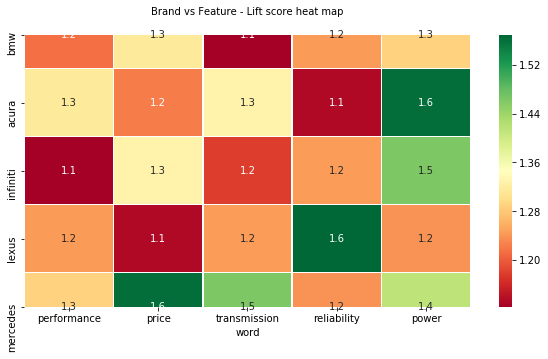

In [0]:
# Lift Matrix
matrix_features.index=brand5
matrix_features.columns=features_10
matrix_features.fillna(0, inplace=True)

plt.figure(figsize=(10,5))
plt.title('Brand vs Feature - Lift score heat map', fontsize = 10, pad = 20)
sns.heatmap(matrix_features, cmap='RdYlGn', linewidths=0.5, annot=True, fmt=".1f", annot_kws={"fontsize":10})

**Insights to Product Manager**

1.   **BMW:** Though BMW claims they are ‘The Ultimate Driving Machine’, the lift calculations between BMW and performance shows otherwise. Upon considering transmission and power, BMW does not score well either. BMW should improve the performance factor to match what their tagline says, according to general public opinion on Edmunds forum
2. **Acura**: Acura passes off among the public as a forgotten luxury car, with higher quality and associated highest with reliability. However, the lift calculations show that Acura drops off at a bad rate here. The lift rate shows that Acura fails here to be qualified as a good performer. Close to the other luxury brands, that is, Mercedes and Infiniti in the MDS chart, the differentiating factor is Acura’s age-old branding as a reliable machine. If the brand captures this back and gets rid of the growing concern over Acura’s performance and reliability, the brand can reinvent itself and get back into the race
3. **Infiniti**: Infiniti, another luxury brand, lies close to Acura in the MDS graph. It fails in the performance sector. While aiming for luxury, a notch better performance would help Infiniti gain a better leverage over the other above-mentioned brands. However, it has an edge over Acura in the pricing aspect.
4. **Lexus**: The name Lexus itself is synonymous to luxury and dependability. In fact, Lexus has won ‘The Most Dependable Luxury brand of 2019’ - eight time in a row. This tells us that the general public do correlate Lexus not only as a luxury brand, pleasing to the eye and aesthetically rich, but also as a highly reliable car. Looking at the lift calculations show us that Lexus is less called of with price related things, which may indicate that people don't talk about Lexus's price much, a positive sign for the brand
5. **Mercedes**: Mercedes, another luxury brand, fails at capturing positive ratings in the performance sector. Gaining good points in the price and transmission feature, it looses edge in the reliability feature. If Mercedes can pull up its reliability , it can race ahead in the luxury beast sector.



**Insights to Marketing/Advertising Team**

1.   **BMW:** Looking at the MDS graph, we can see that BMW is closer to Lexus and Mercedes. With the tagline of ‘The Ultimate Driving Machine’, if public is under the opinion that BMW’s performance is low, sales go down eventually. With the car faring well in design and price, they can used as an edge over its competitors. This can be used for marketing and advertising, increasing BMW’s hold over luxury brands.
2. **Acura**: The reliability factor of Acura can be used to gain foothold in the luxury brands. Looking at the MDS chart, Acura is surrounded by luxury brands. The Lift calculations show that Acura is low in design and price, but it has a good name of a reliable car, with passable performance. These two attributes can be used to market Acura as a reliable, performing luxury car with reliability something the other luxury cars scoring much lower than Acura
3. **Infiniti**: Infiniti fares high in the power part, competing well in the other sectors with it’s closest competitor according to MDS, Acura. Thus using the power factor as its branding and aiming audience who wish for a powerful car, it can gain advantage over Acura
4. **Lexus**: The brand itself is synonymous to luxury and reliablity. No additional effort might be needed here. It does a good job in being dependable and in offering a rich experience. However if Infiniti projects itself using aesthetics, Lexus can always use its already existing luxury tag and the dependability tag – a deadly combination
5. **Mercedes**: Mercedes scores high in the price, transmission and power factor, one among highest among all the five cars discussed here. If these can be used to project Mercedes as a visual treat, with decent performance (already present), sectors that look for power and performance will be the target audience and Mercedes can compete in the luxury power beasts

### Aspirations

In [0]:
# import list of features tagged manually
aspiration_words = pd.read_csv('aspiration_words.csv')
aspiration_words.head()

,Keywords
0,aspire
1,desire
2,want
3,prefer
4,book


In [0]:
scrapped_data['aspiration'] = scrapped_data['cleaned_feature_cars']
for i in range(len(scrapped_data)):
  for k in scrapped_data.loc[i,'cleaned_feature_cars']:
    if k in aspiration_words['Keywords'].values:
      # if we see any aspirational word, add one dummy word 'aspiration' and move to the next comment 
      scrapped_data.loc[i,'cleaned_feature_cars'].append('aspiration')
      break

In [0]:
# brand = top10_cars['word'].values -- defined in Cars Lift calculation
# Calculating Lift between brand and aspirational words
check = 'aspiration'
l = []
n=len(scrapped_data)
for i in range(len(brand)):
    counti=0
    countj=0
    countij=0
    for k in scrapped_data['aspiration']:
      if check in k and brand[i] in k:
        countij+=1
      if check in k:
        countj+=1
      if brand[i] in k:
        counti+=1
      else:
        pass
    l.append([brand[i], (countij*n)/(counti*countj)])
aspiration_lift = pd.DataFrame(l, columns=['Brand','Aspiration Lift'])

In [0]:
aspiration_lift.sort_values(by = 'Aspiration Lift', ascending = False)

,Brand,Aspiration Lift
7,toyota,1.460951
3,lexus,1.348102
4,mercedes,1.340306
5,audi,1.311459
6,honda,1.307441
0,bmw,1.269696
2,infiniti,1.244100
8,nissan,1.241179
1,acura,1.171771
9,cadillac,1.020229


**Insights:**

**Toyota** is the most desired brand closely followed by Lexus and Mercedes since it has considerably high lift with aspirational words when compared to other brands. Having observed that Toyota has a high lift with realiability, imply that entry level luxury car prospected buyers are considering realiabilty as top attribute for their decision. 

To identify this, we collated the list of asprirational words like buy, purchase, desire, want and replaced these words with the aspiration in the comment, and performed an analysis to observe lift between the brand and this aspiration word, this lift translates to the measure of people actually wanting to buy and highlighed the top brands with high lift score. 

**Business Implications for Toyota**
Toyota usually brands itself as an affordable and reliable car, so targetting this entry level luxury segment through a dedicated ad-campaign can help establishing themselves in this segment and helps them improve their market share.



